In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Data

## Roles With Descriptions

In [2]:
# load in data 
data_descriptions = pd.read_csv("roles_descriptions.csv") 
descriptions_df = pd.DataFrame(data_descriptions)
descriptions_df

,cluster_name,cluster_percentage
0,Accounting and Finance Professionals,7.95
1,Administrative Support and HR,10.11
2,Care and Education Support,13.97
3,Clinical Care Professionals,4.09
4,Engineering and Quality Assurance,10.76
5,Operations and Management Professionals,6.36
6,Retail and Hospitality Services,7.12
7,Sales and Marketing Professionals,21.80
8,Software and IT Professionals,14.11
9,Technicians,3.72


## Roles Without Descriptions

In [3]:
# load in data 
data_no_descriptions = pd.read_csv("roles_no_descriptions.csv") 
no_descriptions_df = pd.DataFrame(data_no_descriptions)
no_descriptions_df 

,cluster_name,cluster_percentage
0,Accounting and Finance Professionals,10.85
1,Administrative Support and HR,10.67
2,Care and Education Support,11.88
3,Clinical Care Professionals,5.75
4,Engineering and Quality Assurance,8.25
5,Operations and Management Professionals,6.49
6,Retail and Hospitality Services,6.39
7,Sales and Marketing Professionals,21.35
8,Software and IT Professionals,15.89
9,Technicians,2.48


## Years and Description Percentages

In [4]:
# Load in the 2025 data 
description_perc = pd.read_csv("Years and Descriptions_2025_data.csv")
description_perc_df = pd.DataFrame(description_perc)
description_perc_df = description_perc_df.iloc[:-1]
description_perc_df = description_perc_df.astype({'years' : int})
description_perc_df

,years,description_percentage
0,1950,31
1,1951,14
2,1952,31
3,1953,33
4,1954,33
...,...,...
71,2021,34
72,2022,32
73,2023,30
74,2024,26


In [5]:
# Load in the 2022 data 
description_22perc = pd.read_csv("Years and Descriptions_2022_data.csv")
description_22perc_df = pd.DataFrame(description_22perc)
description_22perc_df = description_22perc_df.astype({'years' : int})
description_22perc_df

,years,description_percentage
0,1950,32
1,1951,19
2,1952,33
3,1953,36
4,1954,35
...,...,...
68,2018,39
69,2019,36
70,2020,33
71,2021,25


## Roles, Years, and Description Percentages

In [6]:
# Load in the 2025 data 
role_description_perc = pd.read_csv("roles_years_descriptions_2025_data.csv")
role_description_perc_df = pd.DataFrame(role_description_perc)
role_description_perc_df

,years,clusters,description_percentage
0,2016,Accounting and Finance Professionals,42.26
1,2016,Administrative Support and HR,42.71
2,2016,Care and Education Support,47.71
3,2016,Clinical Care Professionals,38.40
4,2016,Engineering and Quality Assurance,48.26
...,...,...,...
95,2025,Operations and Management Professionals,15.86
96,2025,Retail and Hospitality Services,16.52
97,2025,Sales and Marketing Professionals,21.50
98,2025,Software and IT Professionals,18.12


In [7]:
s = sorted((role_description_perc_df.clusters).unique())
s[np.argmin(role_description_perc_df.loc[role_description_perc_df['years'] == 2016, 'description_percentage'].values - role_description_perc_df.loc[role_description_perc_df['years'] == 2025, 'description_percentage'].values)]

'Care and Education Support'

## AI Classifications per Year

In [10]:
AI_class = pd.read_csv("AI_classification_per_year.csv")
AI_class_df = pd.DataFrame(AI_class)
AI_class_df = AI_class_df.iloc[:-1].astype({"years": int})
AI_class_df

,years,AI_perc,not_AI_perc
0,1950,0.0381,99.9619
1,1951,0.0282,99.9718
2,1952,0.0246,99.9754
3,1953,0.0315,99.9685
4,1954,0.0600,99.9400
...,...,...,...
71,2021,0.6184,99.3816
72,2022,0.6780,99.3220
73,2023,0.8852,99.1148
74,2024,1.2018,98.7982


# Plots

## Representations of Roles in Positions with and without Descriptions

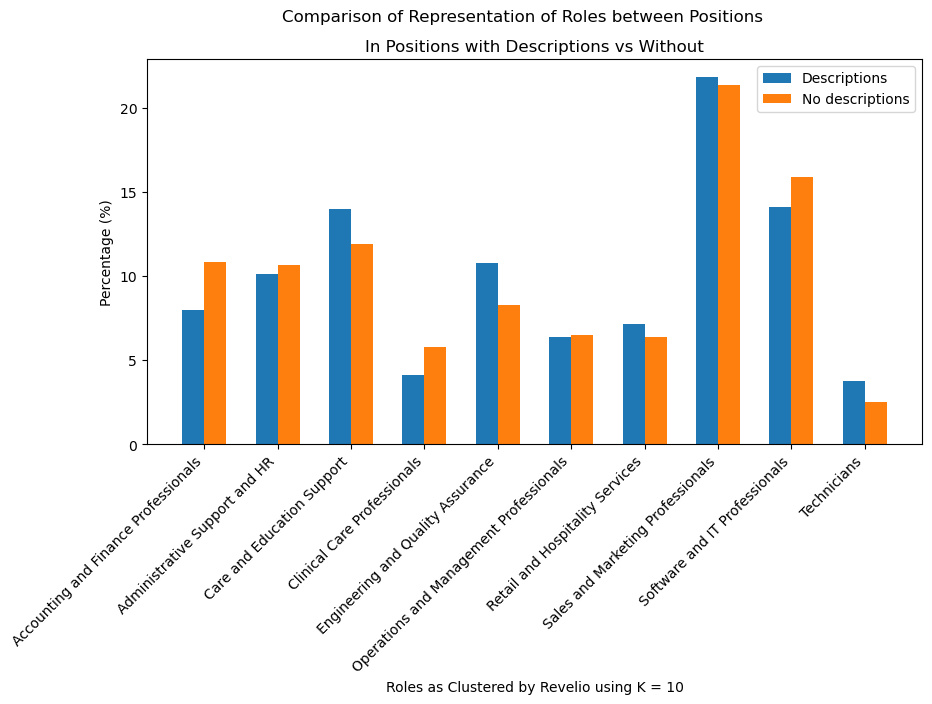

In [4]:
# Source: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
# Data on X-axis
N = len(descriptions_df)
# Specify the values of blue bars (height)
blue_bar = descriptions_df.cluster_percentage
# Specify the values of orange bars (height)
orange_bar = no_descriptions_df.cluster_percentage

# Position of bars on x-axis
ind = np.arange(N) 

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Descriptions')
plt.bar(ind + width, orange_bar, width, label='No descriptions')

plt.xlabel('Roles as Clustered by Revelio using K = 10')
plt.ylabel('Percentage (%)')
plt.title('In Positions with Descriptions vs Without')
plt.suptitle('Comparison of Representation of Roles between Positions')

# xticks()
plt.xticks(ind + width / 2, descriptions_df.cluster_name, rotation = 45, ha = "right")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Change in % of Descriptions contained in Positions over the Years 

Text(0.5, 1.0, '2022')

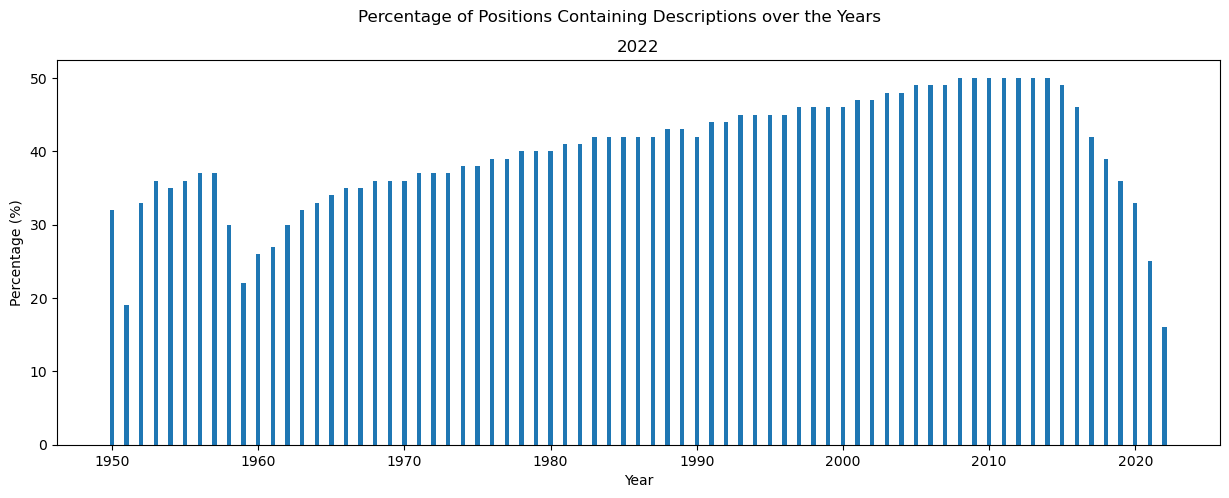

In [5]:
# 2022

# Figure size
plt.figure(figsize=(15,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(description_22perc_df.years, description_22perc_df.description_percentage , width)

plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.suptitle('Percentage of Positions Containing Descriptions over the Years')
plt.title('2022')

Text(0.5, 1.0, '2025')

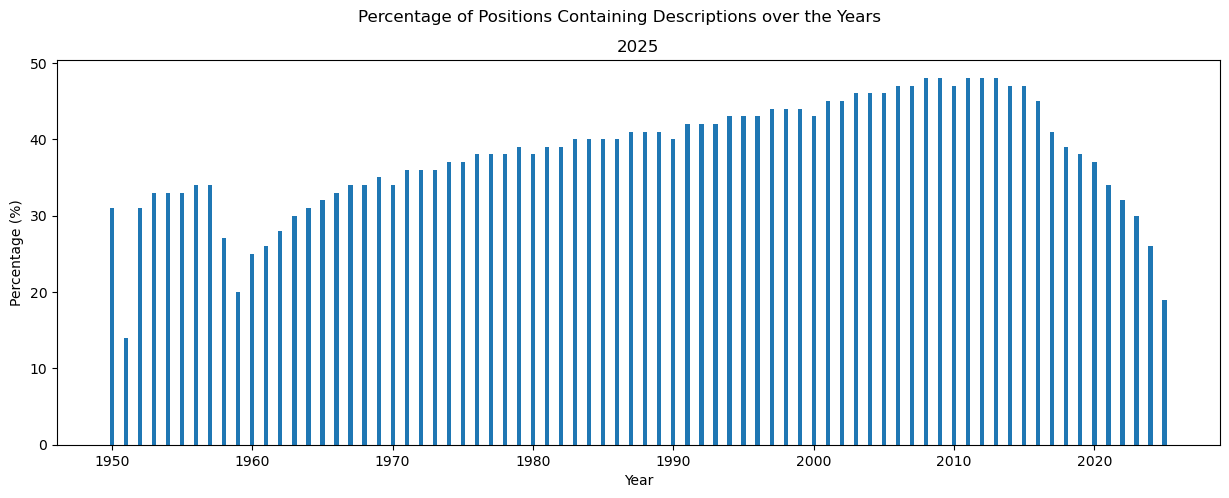

In [8]:
# 2025

# Figure size
plt.figure(figsize=(15,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(description_perc_df.years, description_perc_df.description_percentage , width)

plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.suptitle('Percentage of Positions Containing Descriptions over the Years')
plt.title('2025')

In [33]:
role_description_perc_df.loc[role_description_perc_df['clusters'] == role].description_percentage

6     39.68
16    36.65
26    35.36
36    34.62
46    34.10
56    32.49
66    31.06
76    29.52
86    25.93
96    16.52
Name: description_percentage, dtype: float64

## Representations of Roles with Descriptions by Year

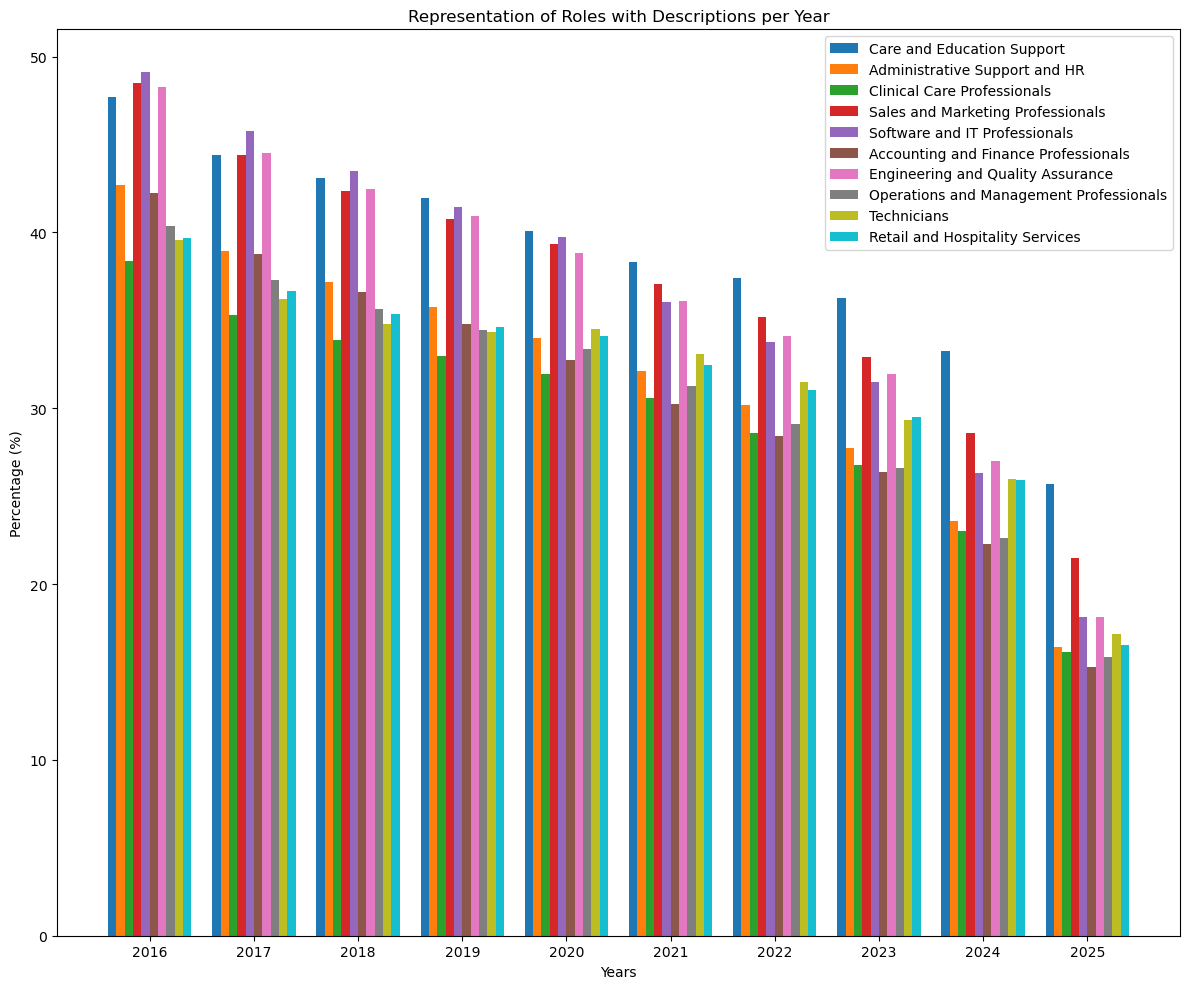

In [35]:
years = set(role_description_perc_df['years'])
roles = set(role_description_perc_df['clusters'])

N = len(years)
M = len(roles)
ind = np.arange(N)  # x positions for years
width = 0.08  # width of each bar

plt.figure(figsize=(12,10))

for i, role in enumerate(roles):
    # Extract percentages for this role across all years
    perc = role_description_perc_df.loc[role_description_perc_df['clusters'] == role].description_percentage
    
    plt.bar(ind + i*width, perc, width, label=role)

# Center xticks under clusters
plt.xticks(ind + width*(M-1)/2, years)
plt.xlabel('Years')
plt.ylabel('Percentage (%)')
plt.title('Representation of Roles with Descriptions per Year')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## AI Clasification per Year

Text(0.5, 1.0, 'Percentage of Positions Flagged for AI over the Years')

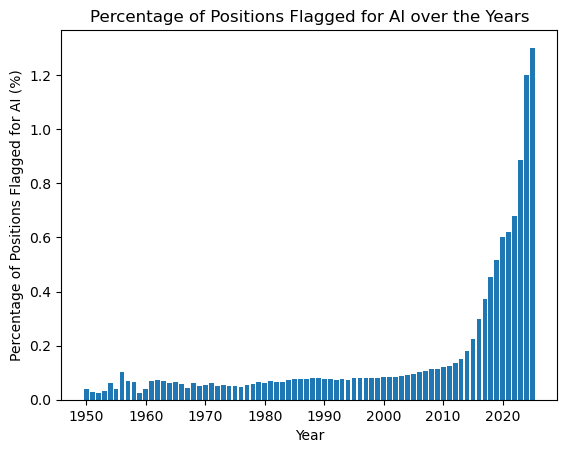

In [16]:
years = AI_class_df.years
AI = AI_class_df.AI_perc

plt.bar(years, AI)
plt.xlabel("Year")
plt.ylabel("Percentage of Positions Flagged for AI (%)")
plt.title("Percentage of Positions Flagged for AI over the Years")


Text(0.5, 1.0, 'Percentage of Positions Not Flagged for AI over the Years')

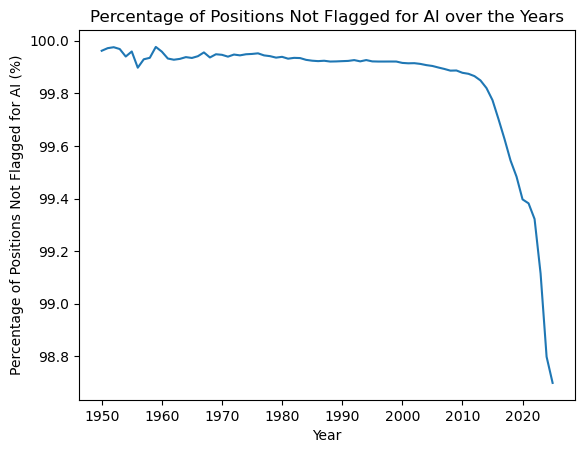

In [18]:
years = AI_class_df.years
not_AI = AI_class_df.not_AI_perc

plt.plot(years, not_AI)
plt.xlabel("Year")
plt.ylabel("Percentage of Positions Not Flagged for AI (%)")
plt.title("Percentage of Positions Not Flagged for AI over the Years")